In [13]:
from almanac.data.data import pd_readcsv


In [14]:
from almanac.analysis.calculate_returns import calculate_perc_returns

In [15]:
from almanac.utils.utils import *



In [16]:
from almanac.analysis.calculate_stats import Stats

In [17]:
data=pd_readcsv(filename='../sample_data/jumbo/SP500_micro.csv')
data

,Unnamed: 0,adjusted,underlying
1982-09-14,0,438.15,123.70
1982-09-15,1,438.65,124.20
1982-09-16,2,438.00,123.55
1982-09-17,3,437.10,122.65
1982-09-20,4,437.90,123.45
...,...,...,...
2022-12-22,10431,3847.50,3847.50
2022-12-23,10432,3868.50,3868.50
2022-12-27,10433,3856.25,3856.25
2022-12-28,10434,3810.50,3810.50


In [18]:
adjusted_price = data.adjusted
current_price = data.underlying
multiplier = 5
fx_series = pd.Series(1, index=data.index)  
position_contracts_held = pd.Series(1, index=data.index)  

capital_required = multiplier * current_price 


In [19]:
perc_return = calculate_perc_returns(
    position_contracts_held=position_contracts_held,
    adjusted_price = adjusted_price,
    fx_series=fx_series,
    capital_required=capital_required,
    multiplier=multiplier
)



In [20]:
a = Stats(perc_return)

In [21]:
a.stats()

In [22]:
a.stats(show=True)

{'ann_mean': 0.052353634916455644,
 'ann_std': 0.19636552367873483,
 'sharpe_ratio': 0.2666131708645005,
 'skew': -3.582341331177283,
 'avg_drawdown': 0.2279232124283646,
 'max_drawdown': 1.2141040208288036,
 'quant_ratio_lower': 2.2507312629781895,
 'quant_ratio_upper': 1.6167711048570752}

In [23]:
a.show_stats()

{'ann_mean': 0.052353634916455644,
 'ann_std': 0.19636552367873483,
 'sharpe_ratio': 0.2666131708645005,
 'skew': -3.582341331177283,
 'avg_drawdown': 0.2279232124283646,
 'max_drawdown': 1.2141040208288036,
 'quant_ratio_lower': 2.2507312629781895,
 'quant_ratio_upper': 1.6167711048570752}

### Strategy 2

In [24]:
import pandas as pd
from almanac.data.data import pd_readcsv
from almanac.analysis.calculate_returns import calculate_perc_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.analysis.positions import calculate_position_series_given_fixed_risk
from almanac.analysis.std_for_risk import calculate_standard_deviation_for_risk_targeting


In [25]:
data=pd_readcsv(filename='../sample_data/jumbo/SP500_micro.csv')
data

,Unnamed: 0,adjusted,underlying
1982-09-14,0,438.15,123.70
1982-09-15,1,438.65,124.20
1982-09-16,2,438.00,123.55
1982-09-17,3,437.10,122.65
1982-09-20,4,437.90,123.45
...,...,...,...
2022-12-22,10431,3847.50,3847.50
2022-12-23,10432,3868.50,3868.50
2022-12-27,10433,3856.25,3856.25
2022-12-28,10434,3810.50,3810.50


In [26]:
data = data.dropna()

adjusted_price = data.adjusted
current_price = data.underlying
multiplier = 5
risk_target_tau= .2
fx_series = pd.Series(1, index=data.index)  ## FX rate, 1 for USD / USD

capital= 100000

instrument_risk = calculate_standard_deviation_for_risk_targeting(adjusted_price=adjusted_price,
                                                                    current_price=current_price)

position_contracts_held = calculate_position_series_given_fixed_risk(capital=capital,
                                                                        fx=fx_series,
                                                                        instrument_risk_ann_perc=instrument_risk,
                                                                        risk_target_tau=risk_target_tau,
                                                                        multiplier=multiplier,
                                                                        current_price=current_price)


In [27]:
perc_return = calculate_perc_returns(
        position_contracts_held=position_contracts_held,
        adjusted_price = adjusted_price,
        fx_series=fx_series,
        capital_required=capital,
        multiplier=multiplier
    )

In [28]:
b= Stats(perc_return)
b.stats()
b.show_stats()

{'ann_mean': 0.08869847948585545,
 'ann_std': 0.1923835527507013,
 'sharpe_ratio': 0.4610502208616278,
 'skew': -1.0070528799818221,
 'avg_drawdown': 0.10547829083219713,
 'max_drawdown': 0.7778563754032308,
 'quant_ratio_lower': 2.1056938879278193,
 'quant_ratio_upper': 1.712360749734482}

In [29]:
b= Stats(perc_return)
b.stats()
b.show_stats()

{'ann_mean': 0.08869847948585545,
 'ann_std': 0.1923835527507013,
 'sharpe_ratio': 0.4610502208616278,
 'skew': -1.0070528799818221,
 'avg_drawdown': 0.10547829083219713,
 'max_drawdown': 0.7778563754032308,
 'quant_ratio_lower': 2.1056938879278193,
 'quant_ratio_upper': 1.712360749734482}

### Strategy 3

In [30]:
import pandas as pd
from almanac.data.data import pd_readcsv
from almanac.analysis.calculate_returns import calculate_perc_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.utils.standardDeviation import standardDeviation
from almanac.analysis.positions import calculate_position_series_given_variable_risk


In [31]:
data=pd_readcsv(filename='../sample_data/jumbo/SP500_micro.csv')
data

,Unnamed: 0,adjusted,underlying
1982-09-14,0,438.15,123.70
1982-09-15,1,438.65,124.20
1982-09-16,2,438.00,123.55
1982-09-17,3,437.10,122.65
1982-09-20,4,437.90,123.45
...,...,...,...
2022-12-22,10431,3847.50,3847.50
2022-12-23,10432,3868.50,3868.50
2022-12-27,10433,3856.25,3856.25
2022-12-28,10434,3810.50,3810.50


In [32]:
data = data.dropna()

adjusted_price = data.adjusted
current_price = data.underlying
multiplier = 5
risk_target_tau = 0.2
fx_series = pd.Series(1, index=data.index)  ## FX rate, 1 for USD / USD

capital = 100000  ## applies only to strategy 1

## eithier use annual # % returns, or daily price differences to calculate
instrument_risk = standardDeviation(
    adjusted_price=adjusted_price,
    current_price=current_price,
    use_perc_returns=True,
    annualise_stdev=True,
)

## or
"""
instrument_risk = standardDeviation(adjusted_price=adjusted_price,
                                            current_price=current_price,
                                                use_perc_returns=False,
                                                annualise_stdev=False)
"""

position_contracts_held = calculate_position_series_given_variable_risk(
    capital=capital,
    fx=fx_series,
    instrument_risk=instrument_risk,
    risk_target_tau=risk_target_tau,
    multiplier=multiplier,
)

perc_return = calculate_perc_returns(
    position_contracts_held=position_contracts_held,
    adjusted_price=adjusted_price,
    fx_series=fx_series,
    capital_required=capital,
    multiplier=multiplier,
)


In [33]:
c= Stats(perc_return)
c.stats()
c.show_stats()

{'ann_mean': 0.10175733718750084,
 'ann_std': 0.20300705509510722,
 'sharpe_ratio': 0.5012502503414392,
 'skew': -1.041154951117224,
 'avg_drawdown': 0.1544313132868492,
 'max_drawdown': 0.854939454108862,
 'quant_ratio_lower': 1.6193183169361764,
 'quant_ratio_upper': 1.210222998273329}

### Strategy 4

In [34]:
import pandas as pd
from almanac.data.data import get_data_dict
from almanac.analysis.calculate_returns import calculate_perc_returns, aggregate_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.utils.standardDeviation import standardDeviation
from almanac.utils.fx_series import create_fx_series_given_adjusted_prices_dict
from almanac.analysis.std_for_risk import calculate_variable_standard_deviation_for_risk_targeting_from_dict
from almanac.analysis.positions import calculate_position_series_given_variable_risk_for_dict
from almanac.analysis.calculate_returns import calculate_perc_returns_for_dict
from almanac.config.instruments import *
import quantstats as qs
# read=Read_csv()

In [35]:
adjusted_prices, current_prices = get_data_dict('../sample_data/jumbo/',INSTRUMENT_LIST)



fx_series_dict = create_fx_series_given_adjusted_prices_dict('../sample_data/fx_data/',adjusted_prices)
risk_target_tau= 0.2
capital = 1000000
idm = 1.5

std_dev_dict = calculate_variable_standard_deviation_for_risk_targeting_from_dict(
    adjusted_prices=adjusted_prices,
    current_prices=current_prices,
    annualise_stdev=True,  ## can also be False if want to use daily price diff
    use_perc_returns=True,  ## can also be False if want to use daily price diff
)

position_contracts_dict = calculate_position_series_given_variable_risk_for_dict(
    capital=capital,
    risk_target_tau=risk_target_tau,
    idm=idm,
    weights=instrument_weights,
    std_dev_dict=std_dev_dict,
    fx_series_dict=fx_series_dict,
    multipliers=multipliers,
)

perc_return_dict = calculate_perc_returns_for_dict(
    position_contracts_dict=position_contracts_dict,
    fx_series=fx_series_dict,
    multipliers=multipliers,
    capital=capital,
    adjusted_prices=adjusted_prices,
)

In [36]:
perc_return_dict

{'US2': 2000-03-02         NaN
 2000-03-03         NaN
 2000-03-06         NaN
 2000-03-07    0.000276
 2000-03-08   -0.000041
                 ...   
 2022-12-21    0.000160
 2022-12-22   -0.000228
 2022-12-23   -0.000194
 2022-12-27   -0.000358
 2022-12-28   -0.000075
 Length: 5880, dtype: float64,
 'US3': 2020-08-27         NaN
 2020-08-28         NaN
 2020-08-31         NaN
 2020-09-01    0.000031
 2020-09-02   -0.000035
                 ...   
 2022-12-21    0.000060
 2022-12-22   -0.000053
 2022-12-23   -0.000141
 2022-12-27   -0.000216
 2022-12-28    0.000022
 Length: 589, dtype: float64,
 'US5': 1989-05-31         NaN
 1989-06-01         NaN
 1989-06-02         NaN
 1989-06-05    0.000147
 1989-06-06    0.000010
                 ...   
 2022-12-21    0.000084
 2022-12-22   -0.000136
 2022-12-23   -0.000197
 2022-12-27   -0.000386
 2022-12-28   -0.000156
 Length: 8568, dtype: float64,
 'US10': 1982-08-30         NaN
 1982-08-31         NaN
 1982-09-01         NaN
 1982-09-02    

In [37]:
perc_return_agg = aggregate_returns(perc_return_dict)

/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=

                           Strategy
-------------------------  ----------
Start Period               1970-02-06
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          297.85%
CAGR﹪                     1.82%

Sharpe                     0.5
Prob. Sharpe Ratio         100.0%
Smart Sharpe               0.47
Sortino                    0.92
Smart Sortino              0.86
Sortino/√2                 0.65
Smart Sortino/√2           0.61
Omega                      1.13

Max Drawdown               -21.92%
Longest DD Days            3566
Volatility (ann.)          5.09%
Calmar                     0.08
Skew                       32.36
Kurtosis                   2576.71

Expected Daily %           0.01%
Expected Monthly %         0.22%
Expected Yearly %          2.64%
Kelly Criterion            6.3%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.52%
Expected Shortfall (cVaR)  -0.52%

Max Consecutive Wins    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-08,2022-12-28,2022-12-30,418,-21.923882,-21.108282
2,2014-06-27,2016-01-21,2017-10-15,1207,-12.105855,-11.070335
3,1980-02-12,1985-02-25,1989-11-16,3566,-11.318400,-10.830818
4,2008-03-17,2008-10-24,2009-11-08,602,-9.384485,-9.137479
5,2020-01-06,2020-03-18,2020-07-05,182,-8.926869,-8.566264


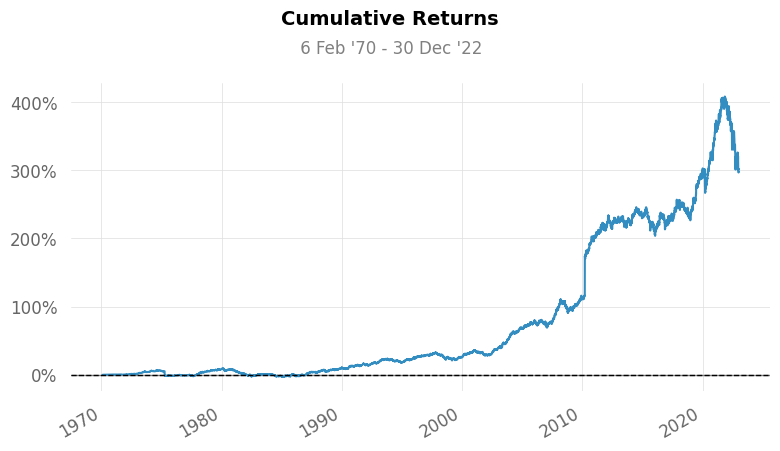

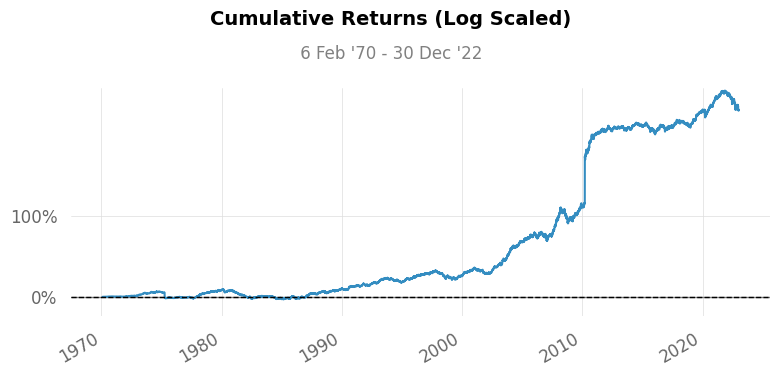

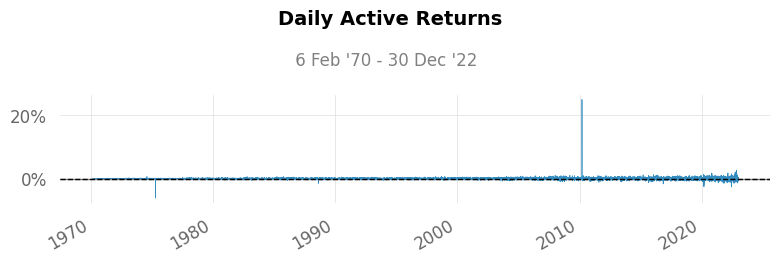

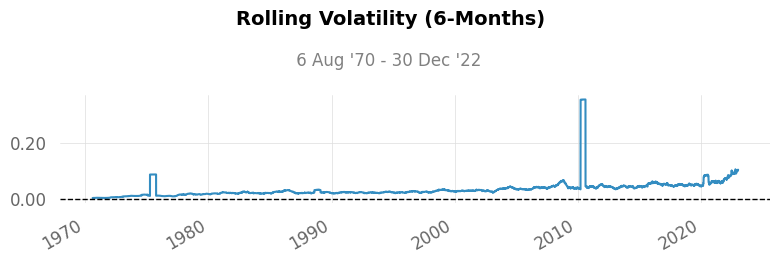

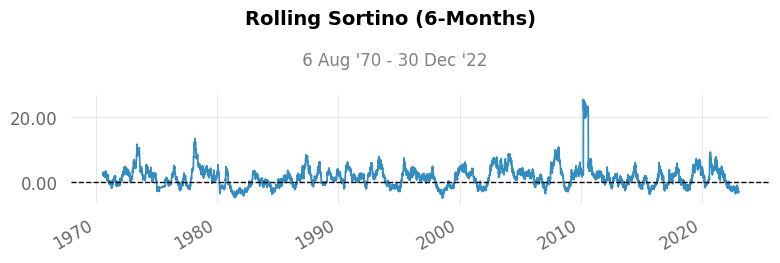

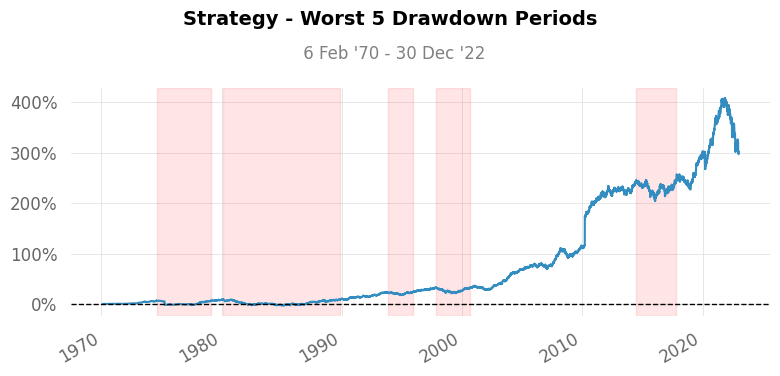

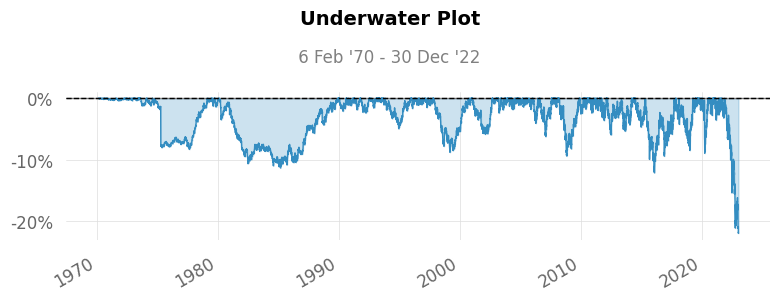

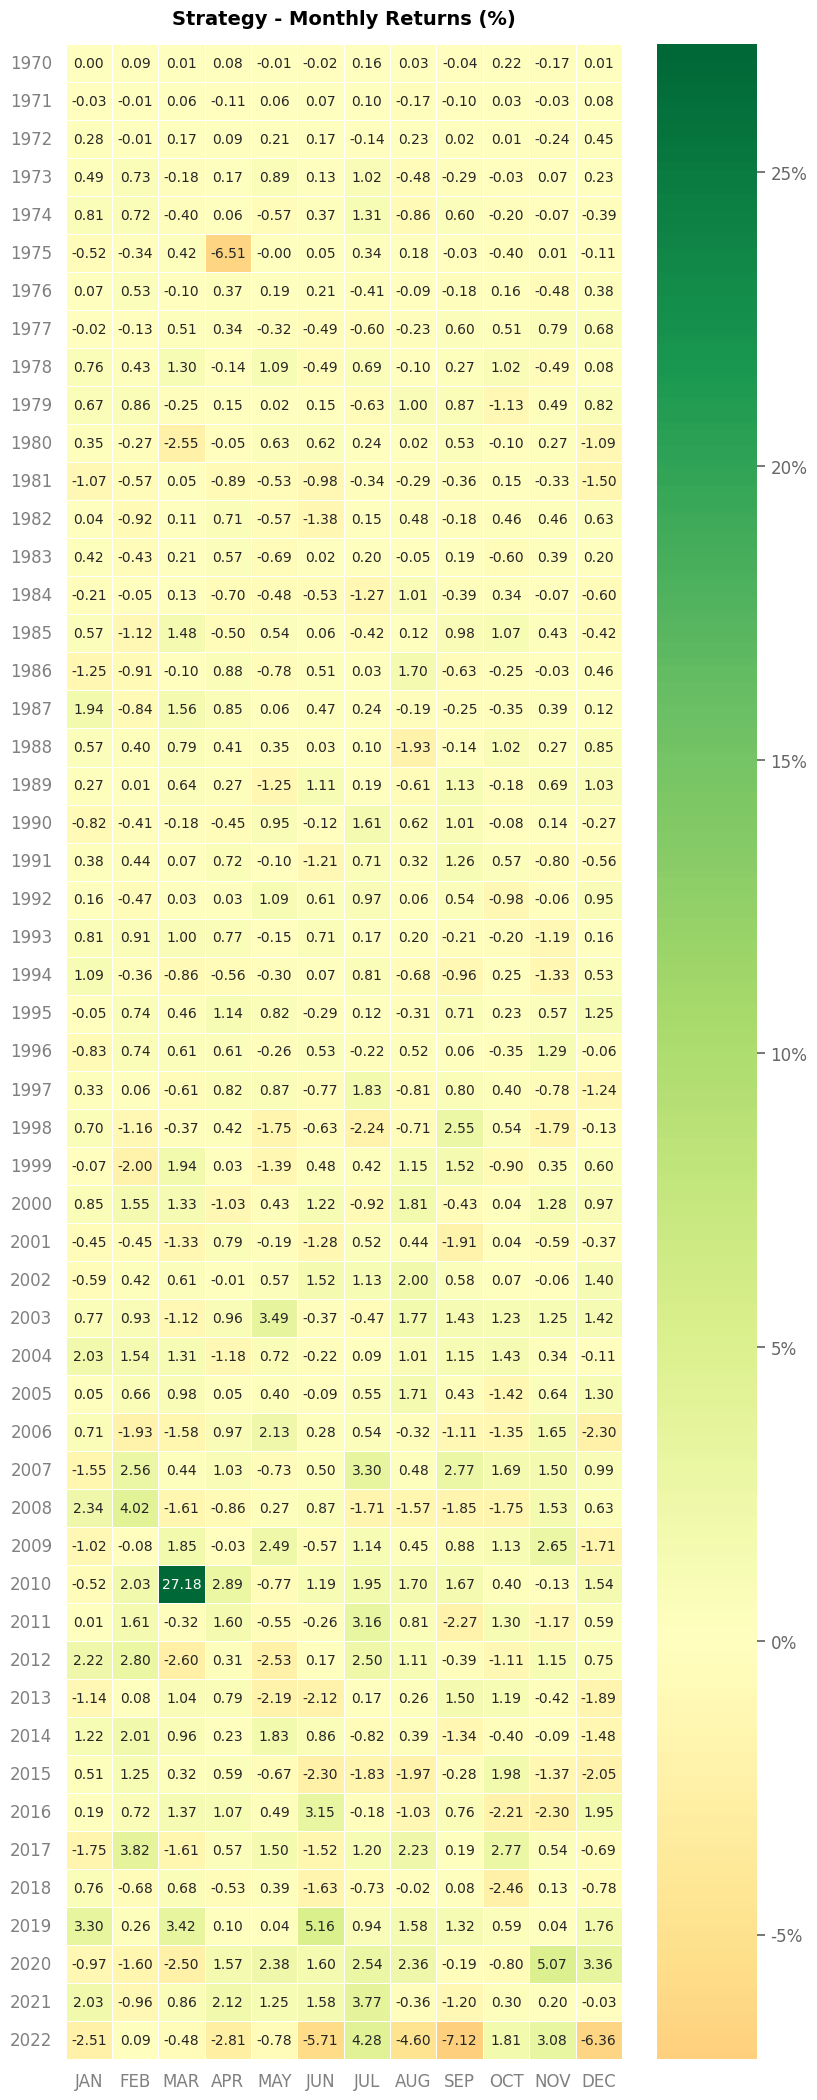

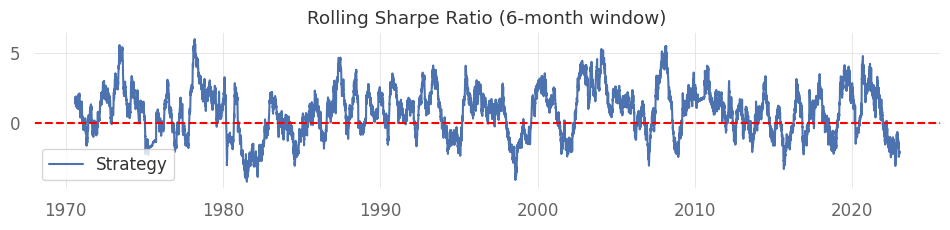

In [38]:
qs.reports.full(perc_return_agg)

In [39]:
perc_return_agg

1970-02-06   -0.000006
1970-02-09    0.000046
1970-02-10    0.000091
1970-02-11    0.000153
1970-02-12   -0.000043
                ...   
2022-12-26    0.001209
2022-12-27   -0.008202
2022-12-28   -0.004975
2022-12-29    0.005103
2022-12-30   -0.002632
Length: 14338, dtype: float64

In [40]:
from almanac.data.data import get_data_dict
from almanac.analysis.calculate_returns import  aggregate_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.utils.fx_series import create_fx_series_given_adjusted_prices_dict
from almanac.analysis.std_for_risk import calculate_variable_standard_deviation_for_risk_targeting_from_dict
from almanac.analysis.positions import calculate_position_series_given_variable_risk_for_dict
from almanac.config.instruments import *

In [2]:
# b= Stats(perc_return_agg)
# b.stats()
# b.show_stats()

In [3]:
from almanac.strategy.strategy4 import Strategy4
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict

In [4]:
strat = Strategy4(data_path = '../sample_data/jumbo/',
                  fx_path= '../sample_data/fx_data/',
                  instrument_list= INSTRUMENT_LIST,
                  instrument_weights= instrument_weights,
                  multipliers= multipliers,
                  idm = 2.5, risk_target= 0.2, capital= 50000000
                  )

In [5]:
# strat.get_quantstats()

In [6]:
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
from almanac.data.data import get_data_dict
from almanac.utils.fx_series import create_fx_series_given_adjusted_prices_dict
from almanac.analysis.std_for_risk import calculate_variable_standard_deviation_for_risk_targeting_from_dict
from almanac.analysis.positions import calculate_position_series_given_variable_risk_for_dict, calculate_position_dict_with_trend_filter_applied
from almanac.analysis.calculate_returns import calculate_perc_returns_for_dict_with_costs, aggregate_returns
import quantstats as qs

In [7]:
len(INSTRUMENT_LIST)

87

In [10]:
adjusted_prices_dict, current_prices_dict = get_data_dict('../sample_data/jumbo/',INSTRUMENT_LIST)
risk_target_tau = 0.2
capital = 50000000
idm= 2.5
fx_series_dict = create_fx_series_given_adjusted_prices_dict('../sample_data/fx_data/',adjusted_prices_dict)
std_dev_dict = calculate_variable_standard_deviation_for_risk_targeting_from_dict(
        adjusted_prices=adjusted_prices_dict,
        current_prices=current_prices_dict,
        use_perc_returns=True,
        annualise_stdev=True,
    )
average_position_contracts_dict = (
        calculate_position_series_given_variable_risk_for_dict(
            capital=capital,
            risk_target_tau=risk_target_tau,
            idm=idm,
            weights=instrument_weights,
            std_dev_dict=std_dev_dict,
            fx_series_dict=fx_series_dict,
            multipliers=multipliers,
        )
    )

position_contracts_dict = calculate_position_dict_with_trend_filter_applied(
        adjusted_prices_dict=adjusted_prices_dict,
        average_position_contracts_dict=average_position_contracts_dict,
    )

perc_return_dict = calculate_perc_returns_for_dict_with_costs(
        position_contracts_dict=position_contracts_dict,
        fx_series=fx_series_dict,
        multipliers=multipliers,
        capital=capital,
        adjusted_prices=adjusted_prices_dict,
        cost_per_contract_dict=cost_per_contract_dict,
        std_dev_dict=std_dev_dict,
    )

perc_return_agg = aggregate_returns(perc_return_dict)

/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/analysis/calculate_returns.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [11]:
perc_return_agg.sum()

2.6694180277977333

/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=

                           Strategy
-------------------------  ----------
Start Period               1970-02-05
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          1,166.43%
CAGR﹪                     3.37%

Sharpe                     0.65
Prob. Sharpe Ratio         100.0%
Smart Sharpe               0.6
Sortino                    1.44
Smart Sortino              1.32
Sortino/√2                 1.01
Smart Sortino/√2           0.93
Omega                      1.22

Max Drawdown               -25.33%
Longest DD Days            912
Volatility (ann.)          7.23%
Calmar                     0.13
Skew                       53.02
Kurtosis                   4853.25

Expected Daily %           0.02%
Expected Monthly %         0.4%
Expected Yearly %          4.91%
Kelly Criterion            9.57%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.73%
Expected Shortfall (cVaR)  -0.73%

Max Consecutive Wins   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-08-16,2022-12-28,2022-12-30,502,-25.332566,-24.797906
2,2018-01-25,2018-11-08,2019-06-18,510,-17.549909,-17.012146
3,2015-04-17,2016-01-03,2017-09-06,874,-14.480732,-14.333240
4,2013-05-21,2013-09-06,2014-05-14,359,-8.000063,-7.919836
5,2008-03-17,2008-08-22,2008-11-05,234,-7.096615,-6.876644


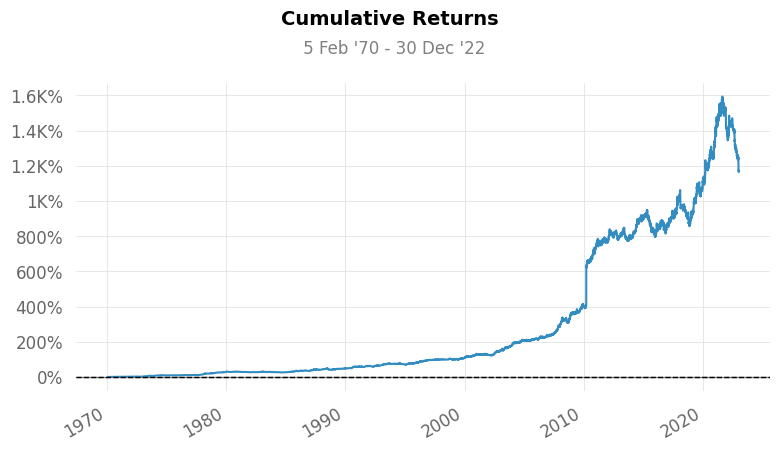

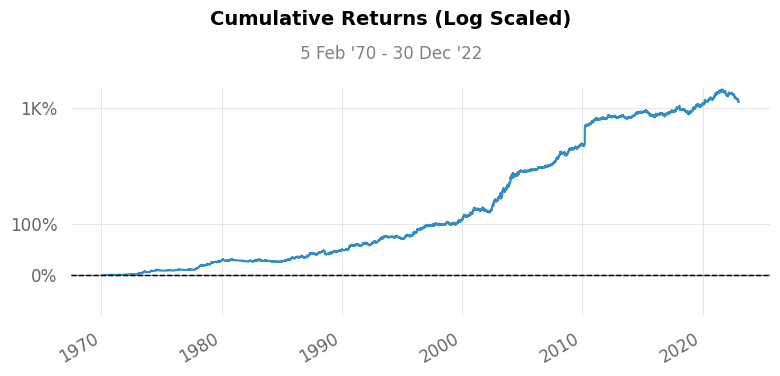

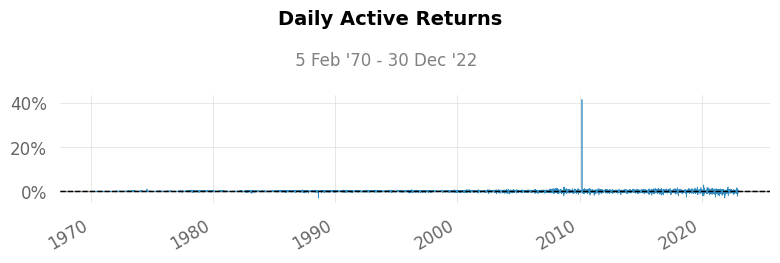

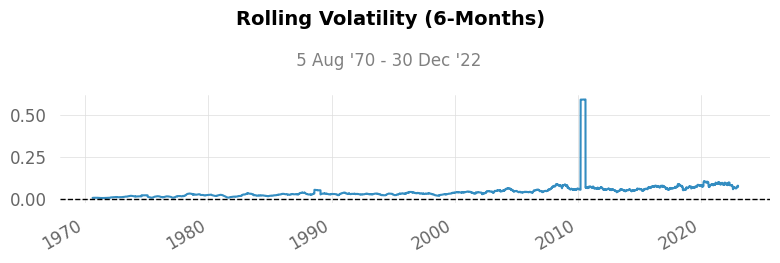

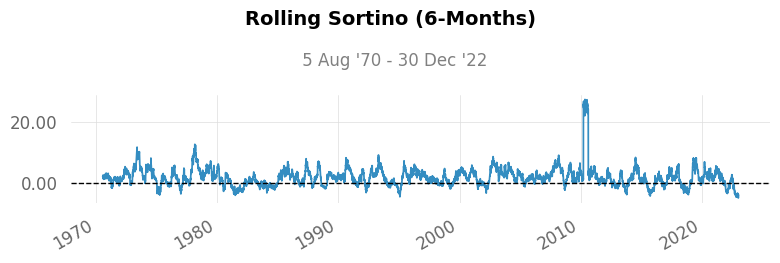

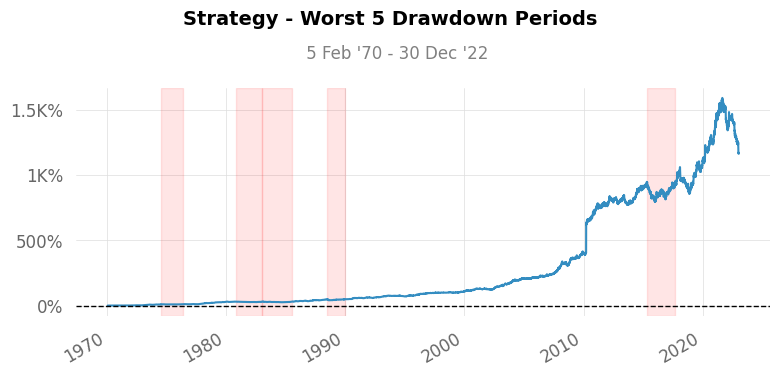

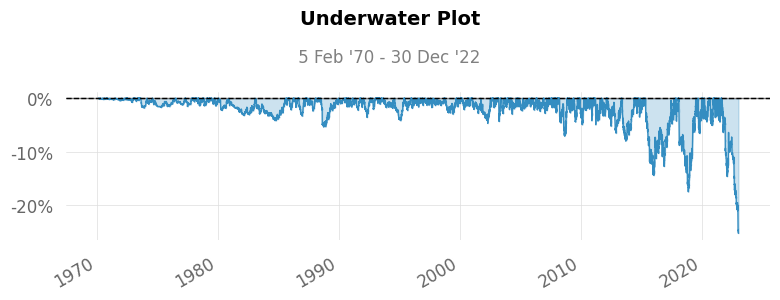

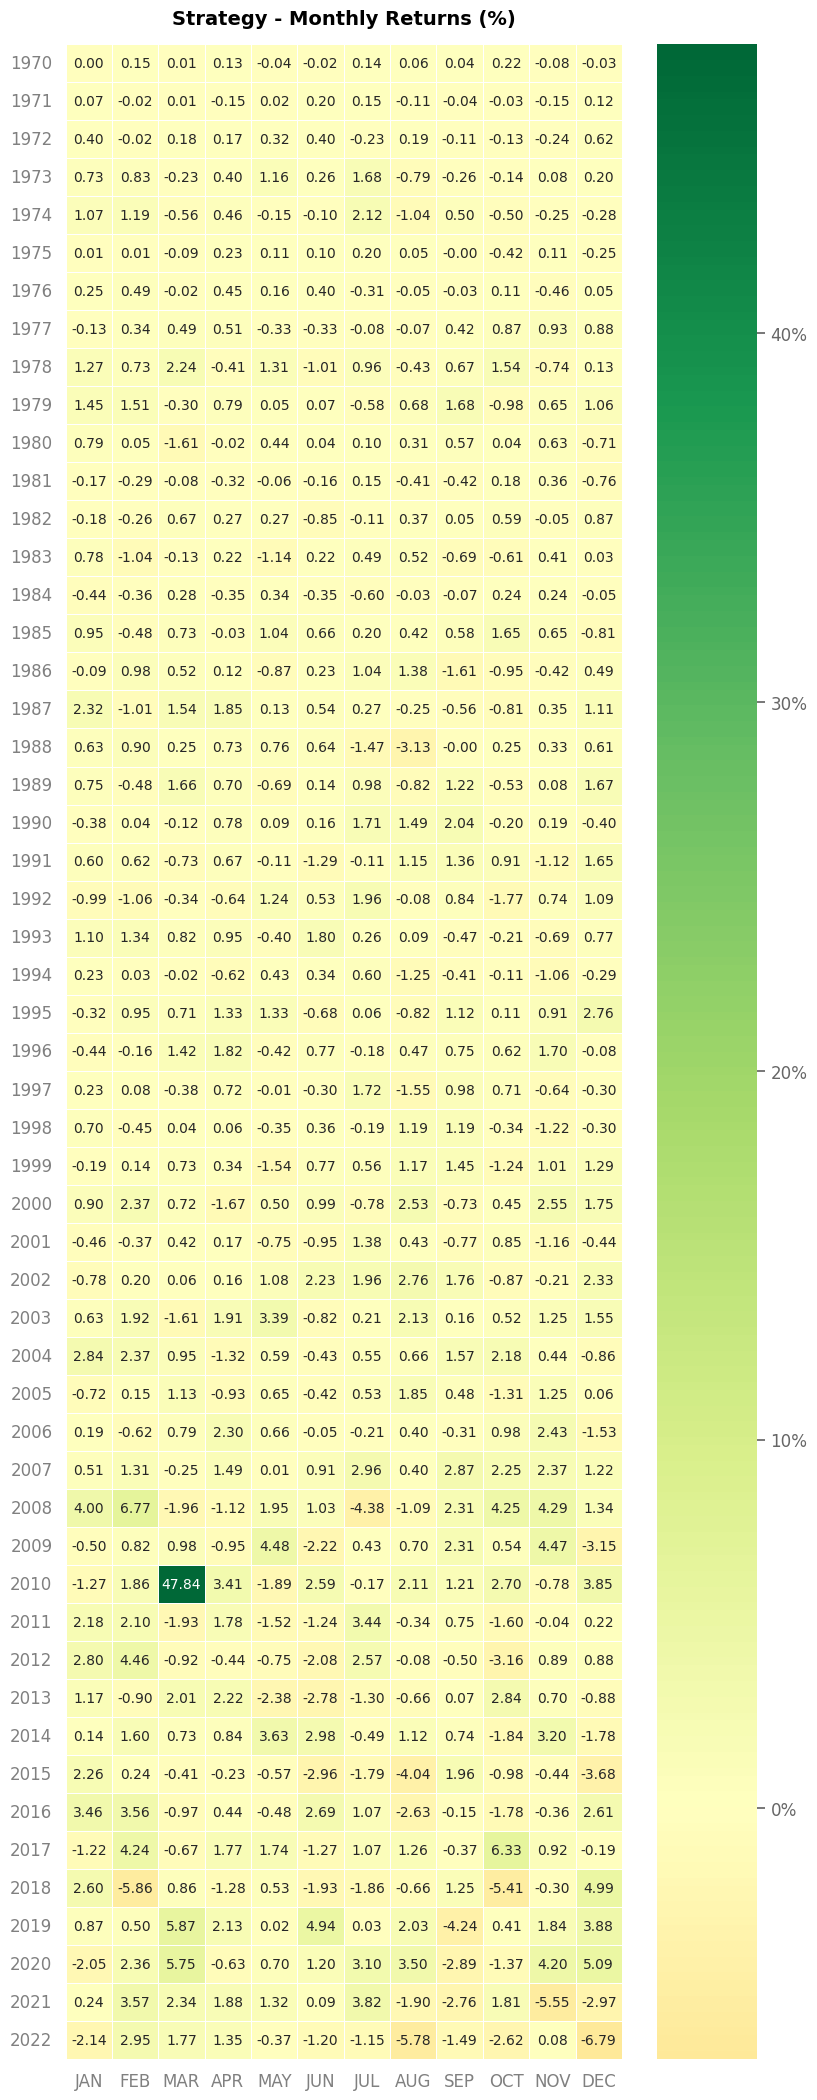

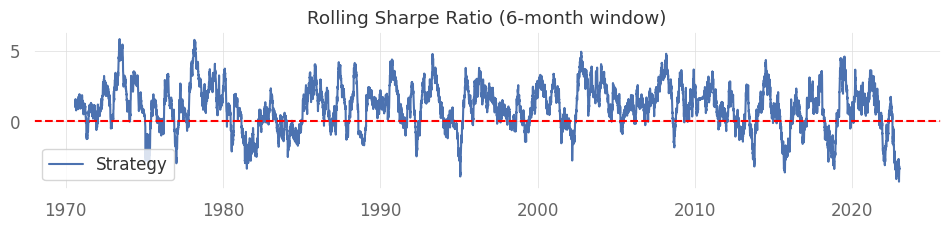

In [12]:
qs.reports.full(perc_return_agg)